# Ejercicio 4
Contenido del dataset: Conjunto de datos de vino rojo para determinar su calidad. Hay 12 atributos y el último atributo es la calidad, que se tomará como etiqueta. La calidad varía de 0 a 10, pero se va a convertir a un problema con dos clases, calidad pobre, de 0 a 5, y buena, de 6 a 10. 
El ejercicio consiste obtener un modelo de clasificación para clasificar las imágenes de árbol enfermos (clase positiva) de imágenes de otro tipo de cubierta (clase negativa). Los atributos son: 1 fixed acidity, 2 volatile acidity, 3 citric acid, 4 residual sugar, 5 chlorides, 6 free sulfur dioxide, 7 total sulfur dioxide, 8 density, 9 pH, 10 sulphates, 11 alcohol, 12 quality (score between 0 and 10)
*   URL: https://archive.ics.uci.edu/ml/datasets/Wine+Quality
*   URL Dataset:https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

**Tomando como base el ejemplo 9 de los suministrados en clase**, implementar un clasificador basado en voting, que use los siguientes clasificadores: Random Forest, Regresión Logística y SVC. Ha de contener los siguientes apartados.
*   Uso de StandardScaler en el preprocesamiento.
*   Uso de train_test_split para obtener conjunto de entrenamiento y test. Usar opción stratify ya que las clases estuviesen desbalanceadas.
*   Aplicar la técnica de voting.
*   Obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Aplicar posteriormente los clasificadores cada uno por separado y obtener las mismas medidas para comparar con el clasificador basado en voting.
*   Escribir al final una celda de texto resumiendo los pasos que se han dado y los resultados obtenidos.

In [44]:
import pandas as pd

In [45]:
%%bash
wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

--2022-12-26 10:28:59--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84199 (82K) [application/x-httpd-php]
Saving to: ‘winequality-red.csv.1’

     0K .......... .......... .......... .......... .......... 60%  389K 0s
    50K .......... .......... .......... ..                   100% 64.9M=0.1s

2022-12-26 10:29:00 (637 KB/s) - ‘winequality-red.csv.1’ saved [84199/84199]



In [46]:
wine = pd.read_csv("/content/winequality-red.csv", sep=';')
#El segundo parámetro es para indicar que los separadotes son puntos y comas, ya que por defecto son comas.
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [47]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [48]:
#Guardamos las etiquetas en y
y = wine["quality"]
#Definimos dos etiquetas, calidad > 5 (clase positiva), calidad <= 5 (clase negativa)
y = (y >5) 
#Eliminamos las etiquetas del data set
X = wine.drop("quality", axis = 1)

In [49]:
#Ahora se escalan los datos
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [50]:
#Vamos a ver las 3 primeras instancias del dataset
X[:3]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711]])

In [51]:
y[:3]

0    False
1    False
2    False
Name: quality, dtype: bool

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [54]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(random_state=42)

In [55]:
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
#voting: {‘hard’, ‘soft’}, default=’hard’
       #Si es "hard", utiliza las etiquetas de clase predichas para la votación por regla de la mayoría.
        #Sino si es 'soft', predice la etiqueta de clase en función del argmax
        # de las sumas de las probabilidades pronosticadas, que se recomienda
        #para un conjunto de clasificadores bien calibrados.

In [56]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [57]:
y_pred = voting_clf.predict(X_test)

In [58]:
#Ahora vamos a calcular accuracy, precision, recall y F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.8025, 0.8110599078341014, 0.822429906542056, 0.8167053364269141)

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)


In [60]:
cm

array([[145,  41],
       [ 38, 176]])

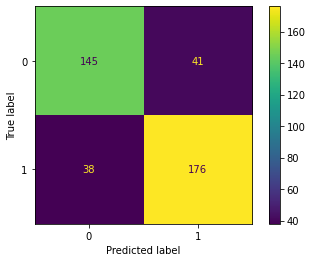

In [61]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [62]:
#ahora se realiza para cada modelo


In [63]:
log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)


In [65]:
cm

array([[134,  52],
       [ 43, 171]])

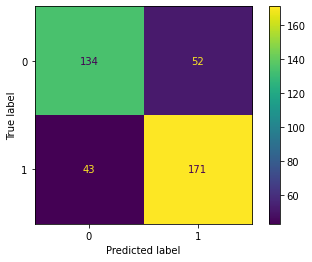

In [66]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [67]:
#Ahora vamos a calcular accuracy, precision, recall y F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.7625, 0.7668161434977578, 0.7990654205607477, 0.7826086956521738)

In [68]:
rnd_clf.fit(X_train, y_train)
y_pred = rnd_clf.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)


In [70]:
cm

array([[154,  32],
       [ 29, 185]])

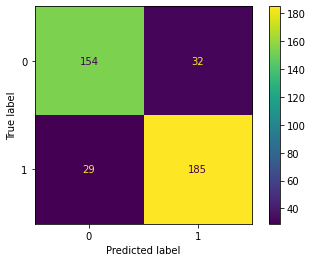

In [71]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [72]:
#Ahora vamos a calcular accuracy, precision, recall y F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.8475, 0.8525345622119815, 0.8644859813084113, 0.8584686774941994)

In [73]:
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)


In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)


In [75]:
cm

array([[137,  49],
       [ 42, 172]])

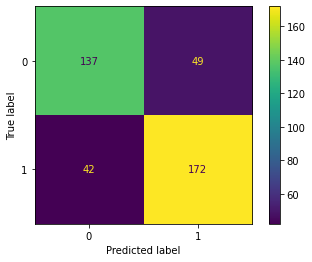

In [76]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [77]:
#Ahora vamos a calcular accuracy, precision, recall y F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.7725, 0.7782805429864253, 0.8037383177570093, 0.7908045977011494)

# **Resultados** 

\begin{array}{|c|c|} \hline
 & accuracy\_score & precision\_score & recall\_score & f1\_score \\ \hline
Voting & 0.8025 & 0.8110 &  0.8224 &  0.8167 \\ \hline
Random Forest & 0.7625 &  0.7668 & 0.7990 & 0.7826 \\ \hline
Regresión Logística & 0.8475 & 0.8525 & 0.8644 & 0.8584 \\ \hline
SVC & 0.7725 & 0.7782 & 0.8037 & 0.7908 \\ \hline
\end{array}

Para la realización de este ejercicio, se ha seguido como ejemplo la práctica 9. Una vez realizado la división de los datos en train y test tras dividir los datos en inputs y outputs, se realizo el modelo voting y el entrenamiento de cada uno de ellos de forma individual. Para cada uno se realizo su matriz de confusión y la extracción de sus parámetros de rendimiento (accuracy, precision, recall y f1). Los resultados, son los que se pueden apreciar en la tabla. 
Sorprendentemente voting o es el mejor, sino que más bien es una media entre todos los modelos, parece ser que el mejor es Regresión Logistica, mientras que SVC y Random Forest son un poco peores, de tal forma que por ello, el resultado del voting es un poco inferior a la Regresión Logistica.